# Цели и задачи

**Цель:** изучить простейшую модель эпидемии, а также реализовать её программно.

**Задачи:**

* изучить теорию о модели эпидемии
* построить модель для случаев:
  * $I(t) \gt I^{*}$
  * $I(t) \le I^{*}$

# Теоретическая справка

Рассмотрим простейшую модель эпидемии. Предположим, что некая популяция, состоящая из $N$ особей, (считаем, что популяция изолирована) подразделяется на три группы. Первая группа - это восприимчивые к болезни, но пока здоровые особи, обозначим их через $S(t)$. Вторая группа – это число инфицированных особей, которые также при этом являются распространителями инфекции, обозначим их $I(t)$. А третья группа, обозначающаяся через $R(t)$ – это здоровые особи с иммунитетом к болезни.

До того, как число заболевших не превышает критического значения $I^*$, считаем, что все больные изолированы и не заражают здоровых. Когда $I(t) \gt I$, тогда инфицирование способны заражать восприимчивых к болезни особей. Для этого случая:

$$
\frac{dS}{dt} = -\alpha{S}\\
\frac{dI}{dt} = \alpha{S}-\beta{I}\\
\frac{dR}{dt} = \beta{I}
$$

Для случая, когда $I(t) \le I$:

$$
\frac{dS}{dt} = 0\\
\frac{dI}{dt} = -\beta{I}\\
\frac{dR}{dt} = \beta{I}
$$

# Программная реализация

## Подготовка к моделированию

Все данные соответствуют варианту 14 = $(1032186063\mod{70}) + 1$.

**Инициализация библиотек**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1.2, spines=False, gridlines='--')

**Начальные данные и необходимые функции**

In [2]:
N = 19500
t0 = 0
I0 = 88
R0 = 25
S0 = N - R0 - I0

alpha = 0.01
beta = 0.02

x0 = np.array([S0, I0, R0])
t = np.arange(0, 200, 0.01)

Объявим необходимые функции, исходя из данной нам информации в теоретической справке.

In [3]:
def dx_less(x,t):
    dS_dt = 0.0
    dI_dt = -beta*x[1]
    dR_dt = beta*x[1]
    return [dS_dt, dI_dt, dR_dt]
    
def dx_greater(x,t):
    dS_dt = -alpha*x[0]
    dI_dt = alpha*x[0] - beta*x[1]
    dR_dt = beta*x[1]
    return [dS_dt, dI_dt, dR_dt]

Заложим в переменные решения для наших СДУ с помощью функции `odeint` модуля `scipy.integrate`.

In [4]:
y_less = odeint(dx_less, x0, t)
y_greater = odeint(dx_greater, x0, t)

## Построение графиков для модели

### Модель при $I(t) \le I^{*}$

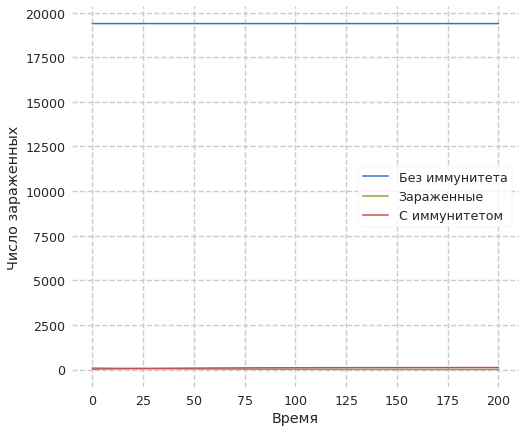

In [5]:
S = [e for e in y_less[:,0]]
I = [e for e in y_less[:,1]]
R = [e for e in y_less[:,2]]

plt.plot(t, S, label='Без иммунитета')
plt.plot(t, I, label='Зараженные')
plt.plot(t, R, label='С иммунитетом')
plt.ylabel('Число зараженных')
plt.xlabel('Время')
plt.legend(loc='best')
plt.show()

### Модель при $I(t) \gt I^{*}$

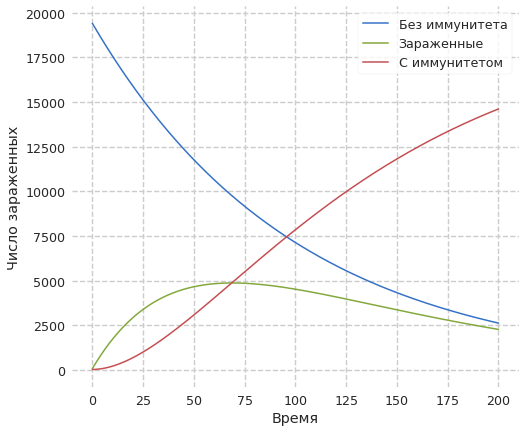

In [6]:
S = [e for e in y_greater[:,0]]
I = [e for e in y_greater[:,1]]
R = [e for e in y_greater[:,2]]

plt.plot(t, S, label='Без иммунитета')
plt.plot(t, I, label='Зараженные')
plt.plot(t, R, label='С иммунитетом')
plt.legend(loc='best')
plt.ylabel('Число зараженных')
plt.xlabel('Время')
plt.show()

# Выводы

Мы изучили простейшую модель эпидемии, после чего успешно реализовали её с помощью языка Python и дополняющих его модулей.